# 1 - Sumário

Neste notebook exploramos o conjunto de dados sobre a renda de adultos. Uma breve análise no conjunto revelou que as classes <=50Ke >50K estão desbalanceadas. Outro ponto que também foi notado era de que o conjunto possuia campos nulos. Devido a baixa proporção de dados nulos no conjunto, a opção de tratamento escolhida foi a de exclusão das linhas que continham dados nulos. 

A primeira abordagem utilizada para resolver esse problema foi a codificação das variáveis nominais. Os testes revelaram uma baixa inferior a 50% na métrica do recall, sendo o desbalanceamento dos dados a razão por trás. Assim sendo, o próximo passo foi a de balancear os dados. Para isso, uma quantidade `n` de instâncias aleatórias da classe dominante foram escolhidas, sendo `n` a quantidade de dados da classe com menor número de instâncias. A segunda abordagem aumentou consideravelmente o recall, mas diminuiu em precisão, acurácia e f1-score, por acabar errando mais casos da classe mais frequente.

A segunda abordagem foi utilizando variáveis dummies. Tendo em vista que todas as classes nominais são discretas, podemos tirar dummies a partir destas colunas. Uma das principais desvantagens desse método é a alta dimensionalidade na qual este método resulta, transformando cada valor que a coluna pode assumir em uma nova coluna. Testes semelhantes aos que foram feitos na abordagem anterior serão feitos, com apenas uma adicional: além do experimento com o conjunto de dados desbalanceados e o outro com os dados balanceados, também faremos um experimento de redução de dimensionalidade. No primeiro teste, o algoritmo LogisticRegression aresentou bons resultados, classificando com menor aleatoriedade se comparado à abordagem utilizando variáveis codificadas. O recall e o f1-score tiveram valores acima dos 60% para a classe 1, provando ter comportamento menos aleatório na classificação das instâncias de classe 1. O segundo teste foi feito reduzindo a dimensionalidade do conjunto, utilizando o algoritmo PCA (Principal Component Analysis). Aqui foram testados de 5 à 97 (tamanho total de variáveis) componentes. Curiosamente, quanto mais dados melhor para este caso, sendo ruim a diminuição de dimensão. O último teste foi com os dados desbalanceados, na qual teve resultados semelhantes à abordagem com dados codificados.

A terceira abordagem foi feita utilizando métodos mais sofisticados de classificação. 3 algoritmos foram considerados, sendo todos eles vistos em aula: Decision Tree, KNearest Neighbors e Support Vector Machines. Considerando que esses modelos possuem parâmetros, que por sua vez devem ser escolhidos empiricamente, foram utilizados uma pequena parcela do conjunto de treino para escolher os melhores parâmetros (dentro do limite de busca especificado). Após esse procedimento, os algoritmos foram aplicados aos conjuntos codificado e com dummies. O SVM demonstrou melhores resultados nos experimentos, tendo melhor resultado em todas as métricas.

Finalmente, no último experimento foi testado a performance da árvore de decisão. O diferencial nesta etapa é a egenharia de atributos, onde alguns valores foram transformados em categoricos ou simplificados, diminuindo assim a dimensão do problema e reduzindo sua complexidade.

# 2 - Importar bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

"""
    age: continuous.
    workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    fnlwgt: continuous.
    education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    education-num: continuous.
    marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
    relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    sex: Female, Male.
    capital-gain: continuous.
    capital-loss: continuous.
    hours-per-week: continuous.
    native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, 
                    Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, 
                    Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, 
                    Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, 
                    Peru, Hong, Holand-Netherlands.
"""

columns_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
               'occupation', 'relationship','race', 'sex', 'capital-gain', 'capital-loss', 
               'hours-per-week', 'native-country', 'target']
dict_map_train = {' <=50K': 0,
                  ' >50K': 1}
dict_map_test = {' <=50K.': 0,
                 ' >50K.': 1,}


# 2.a - Importar os conjuntos de dados e rotular o target

In [2]:
df_train = pd.read_csv('Adult_train.csv', names=columns_names)
df_train.target = df_train.target.map(dict_map_train)
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [3]:
df_test = pd.read_csv('Adult_test.csv', names=columns_names)
df_test.target = df_test.target.map(dict_map_test)
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
target            32561 non-null int64
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [5]:
df_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


# 2.b - Checar a proporção de classes 0 e 1 (<=50K e >50K)

Proporção das classes
0    0.75919
1    0.24081
Name: target, dtype: float64


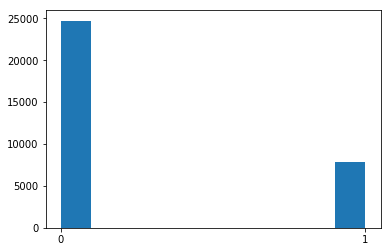

In [6]:
plt.hist(df_train.target)
plt.xticks([0,1], ['0', '1'])
print('Proporção das classes\n{}'.format(df_train.target.value_counts()/df_train.shape[0]))

Os dados estão desbalanceados, e isso pode comprometer a acurácia do modelo

# 3 - Modelo de baseline

Para podermos comparar os resultados e a melhora do modelo, utilizaremos um modelo simples sem preprocessá-lo e observar sua performance. Para isso, consideraremos apenas as variáveis de valores continuos e depois melhoramos os modelos com procedimentos de preprocessamento mais avançados.

In [7]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

NUMERIC_DATA = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
X = df_train[NUMERIC_DATA]
y = df_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=50)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print('Modelo base no conjunto de TREINO: Logistic Regression\n{}'.format(classification_report(y_test, y_pred)))

Modelo base no conjunto de TREINO: Logistic Regression
             precision    recall  f1-score   support

          0       0.81      0.97      0.88      7389
          1       0.74      0.27      0.40      2380

avg / total       0.79      0.80      0.76      9769



In [8]:
X_ = df_test[NUMERIC_DATA]
y_ = df_test['target']

y_pred_ = log_reg.predict(X_)
print('Modelo base no conjunto de TESTE: Logistic Regression\n{}'.format(classification_report(y_, y_pred_)))

Modelo base no conjunto de TESTE: Logistic Regression
             precision    recall  f1-score   support

          0       0.81      0.97      0.88     12435
          1       0.71      0.26      0.38      3846

avg / total       0.78      0.80      0.76     16281



In [9]:
print('Matriz de confusão\n{}'.format(confusion_matrix(y_, y_pred_)))

Matriz de confusão
[[12018   417]
 [ 2846  1000]]


Aparentemente, por existir uma menor quantidade de pessoas que recebem mais de 50k por ano, a classificação da classe 1 está bastante baixa. Dessa forma, a grande quantidade de classes 0 acabam dominando a acurácia do modelo, o que não necessariamente significa que ele é bom. Neste caso, talvez seria uma boa prática, equilibrar os dados antes de passá-los para o modelo.

In [10]:
df_train.replace(to_replace=' ?', value=np.nan, inplace=True)
df_test.replace(to_replace=' ?', value=np.nan, inplace=True)

# 4 - Deletando os dados nulos

Vamos observar a proporção dos dados nulos em relação aos conjunto inteiro

In [11]:
print('---------- Conjunto de treino ----------\n')
for col, value in df_train.isnull().sum().items():
    if value > 0:
        print('Coluna: ', col)
        print('Quantidade: ', value)
        print('Proporção: {0:.2f}%\n\n'.format(value/df_train.shape[0] * 100))

print('---------- Conjunto de test ----------\n')
for col, value in df_test.isnull().sum().items():
    if value > 0:
        print('Coluna: ', col)
        print('Quantidade: ', value)
        print('Proporção: {0:.2f}%\n\n'.format(value/df_train.shape[0] * 100))


---------- Conjunto de treino ----------

Coluna:  workclass
Quantidade:  1836
Proporção: 5.64%


Coluna:  occupation
Quantidade:  1843
Proporção: 5.66%


Coluna:  native-country
Quantidade:  583
Proporção: 1.79%


---------- Conjunto de test ----------

Coluna:  workclass
Quantidade:  963
Proporção: 2.96%


Coluna:  occupation
Quantidade:  966
Proporção: 2.97%


Coluna:  native-country
Quantidade:  274
Proporção: 0.84%




Para confirmar se deletamos todos os dados nulos, vamos printar a soma dos dados nulos

In [12]:
df_train_nonull = df_train.dropna().reset_index(drop=True) # devemos resetar o índice pois pode comprometer o preprocessamento
df_test_nonull = df_test.dropna().reset_index(drop=True)

pd.DataFrame(data=np.transpose([df_train_nonull.isnull().sum().values, df_test_nonull.isnull().sum().values]), 
             index=df_test_nonull.isnull().sum().index, 
             columns=['treino','teste'])

,treino,teste
age,0,0
workclass,0,0
fnlwgt,0,0
education,0,0
education-num,0,0
marital-status,0,0
occupation,0,0
relationship,0,0
race,0,0
sex,0,0


Transformamos os valores `?` em nulos e depois deletamos, agora iremos transformar os dados do tipo objeto na estrutura categorical do pandas, o que deixa o conjunto de dados mais leve para se manipular.

In [13]:
CATEGORICAL = list(set(df_train.columns) - set(NUMERIC_DATA) - set(['target']))
for cat in CATEGORICAL:
    df_train_nonull.loc[:, cat] = pd.Categorical(df_train_nonull[cat])
    df_test_nonull.loc[:, cat] = pd.Categorical(df_test_nonull[cat])
print(df_train_nonull.info(), '\n', df_test_nonull.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null category
fnlwgt            30162 non-null int64
education         30162 non-null category
education-num     30162 non-null int64
marital-status    30162 non-null category
occupation        30162 non-null category
relationship      30162 non-null category
race              30162 non-null category
sex               30162 non-null category
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null int64
native-country    30162 non-null category
target            30162 non-null int64
dtypes: category(8), int64(7)
memory usage: 1.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 15 columns):
age               15060 non-null int64
workclass         15060 non-null category
fnlwgt            15060 non-null int64
ed

# 5 - Primeiro teste:
## Codificar os rótulos

Nesta etapa, estaremos transformando os dados categoricos em números, dessa forma trasnformamos as variáveis nominais em discretas. Isso nos permite utilizar as variáveis nominais no modelo preditor.

In [14]:
from sklearn.preprocessing import LabelEncoder

lb_encoder = LabelEncoder()

df_train_encoded = df_train_nonull.copy()
df_test_encoded = df_test_nonull.copy()

for cat in CATEGORICAL:
    lb_encoder.fit(df_train_nonull[cat])
    df_train_encoded[cat] = lb_encoder.transform(df_train_nonull[cat])
    df_test_encoded[cat] = lb_encoder.transform(df_test_nonull[cat])

df_test_encoded.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


Note que os valoresestão desbalanceados. Enquanto algumas colunas nao passam de dezenas, outros chegam a ter valores superiores a 300000. Quando nos deparamos com esses casos, é importante padronizar os dados para uma certa escala. Para essa etapa do preprocessamento usaremos o StandardScaler da biblioteca do scikit-learn 

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df_train_encoded.drop('target', axis=1))
y = df_train_encoded['target']

log_reg = LogisticRegression()
log_reg.fit(X, y)
y_pred = log_reg.predict(X)
print('Modelo dois (rótulos codificados) conjunto de TREINO:\
       Logistic Regression\nErro da Acurácia: {}\n{}'.format(1 - accuracy_score(y, y_pred),
                                                          classification_report(y, y_pred)))

X_ = scaler.fit_transform(df_test_encoded.drop('target', axis=1))
y_ = df_test_encoded['target']

y_pred_ = log_reg.predict(X_)
print('Modelo dois (rótulos codificados) conjunto de TESTE: \
       Logistic Regression\nErro da Acurácia: {}\n{}'.format(1 - accuracy_score(y_, y_pred_),
                                                          classification_report(y_, y_pred_)))

print('Matriz de confusão\n{}'.format(confusion_matrix(y_, y_pred_)))

Modelo dois (rótulos codificados) conjunto de TREINO:       Logistic Regression
Erro da Acurácia: 0.1794973808102911
             precision    recall  f1-score   support

          0       0.84      0.94      0.89     22654
          1       0.72      0.46      0.56      7508

avg / total       0.81      0.82      0.81     30162

Modelo dois (rótulos codificados) conjunto de TESTE:        Logistic Regression
Erro da Acurácia: 0.17974767596281538
             precision    recall  f1-score   support

          0       0.84      0.94      0.89     11360
          1       0.71      0.45      0.55      3700

avg / total       0.81      0.82      0.81     15060

Matriz de confusão
[[10673   687]
 [ 2020  1680]]


Comparando com o modelo baseline houve uma melhoria geral no modelo. No entanto, obtemos um recall muito baixo. Se analisarmos a matriz de confusão, 1687 instâncias da classe 1 foram corretamente classificadas contra 2013 instâncias da classe 1 sendo classificadas erroneamente. Esse resultado pode ser explicado pelo fato dos dados estarem altamente desbalanceados, dessa forma aprendendo mais os adrões da classe 0 do que a classe 1.

# 5.a - Segundo teste
## Balanceando os dados

Dessa vez, iremos balancear os dados de forma que o conjunto possua 50%-50% de classes 0 e 1. A função definida abaixo pegam `size` (no nosso caso, a quantidade de instâncias da classe 1, cujo é a que possui menor proporção) indices aleatórios e as retornam. Dessa forma, utilizarem apenas esses indices para o treino, desconsiderando todo o resto od conjunto.

In [17]:
def balance_data(df, size):
    index_size = 0
    index_0 = np.array(df.loc[df['target'] == 0].index)
    np.random.shuffle(index_0)
    index_0 = index_0[:class_1_size]
    index_1 = np.array(df[df['target'] == 1].index)
    
    return np.concatenate((index_0, index_1))

class_1_size = df_train_encoded.loc[df_train_encoded.target == 1].shape[0]
bal_index = balance_data(df_train_encoded, class_1_size)

In [18]:
X = scaler.fit_transform(df_train_encoded.drop('target', axis=1).iloc[bal_index])
y = df_train_encoded['target'].iloc[bal_index]

log_reg = LogisticRegression()
log_reg.fit(X, y)
y_pred = log_reg.predict(X)
print('Modelo dois (rótulos codificados) conjunto de TREINO:\
       Logistic Regression\nErro da Acurácia: {}\n{}'.format(1 - accuracy_score(y, y_pred),
                                                          classification_report(y, y_pred)))

X_ = scaler.fit_transform(df_test_encoded.drop('target', axis=1))
y_ = df_test_encoded['target']

y_pred_ = log_reg.predict(X_)
print('Modelo dois (rótulos codificados) conjunto de TESTE: \
       Logistic Regression\nErro da Acurácia: {}\n{}'.format(1 - accuracy_score(y_, y_pred_),
                                                          classification_report(y_, y_pred_)))

print('Matriz de confusão\n{}'.format(confusion_matrix(y_, y_pred_)))

Modelo dois (rótulos codificados) conjunto de TREINO:       Logistic Regression
Erro da Acurácia: 0.22888918486947252
             precision    recall  f1-score   support

          0       0.77      0.77      0.77      7508
          1       0.77      0.77      0.77      7508

avg / total       0.77      0.77      0.77     15016

Modelo dois (rótulos codificados) conjunto de TESTE:        Logistic Regression
Erro da Acurácia: 0.3171978751660026
             precision    recall  f1-score   support

          0       0.94      0.62      0.75     11360
          1       0.43      0.88      0.58      3700

avg / total       0.82      0.68      0.70     15060

Matriz de confusão
[[7019 4341]
 [ 436 3264]]


Com os dados balanceados, houve uma melhora signifcativa do recall. No entanto, outras métricas tiveram uma queda considerável, como precision e f1 score. Melhorar o recall implica diretamente em diminuir precisão, e um equilibrio entre os dois é um desafio. Aqui é aberto para discussão: o que é melhor para o modelo? Prever corretamente as pessoas que recebem <=50K por ano ou prever mais essoas que recebem mais de >50K por ano?

# 6 - Utilizando as variáveis como dummies

Agora ao invés de utilizarmos as variáveis categóricas codificadas, iremos utilizar dummies para representar as variáveis categóricas. Esse método pode aumentar muito a dimensionalidade do conjunto, tornando-o mais complexo e computacionalmente custoso.

In [19]:
dummies = pd.get_dummies(df_train_nonull[CATEGORICAL], drop_first=True)
df_train_wdummies = pd.concat([dummies, df_train_nonull], axis=1)
df_train_wdummies.head()

,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,...,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,0,0,0,0,0,0,0,0,0,0,...,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,0,0,0,0,0,0,0,0,0,0,...,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,0,0,0,0,0,0,0,0,0,0,...,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,0,0,0,0,0,0,0,0,0,0,...,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,0,0,0,1,0,0,0,0,0,0,...,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [20]:
dummies = pd.get_dummies(df_test_nonull[CATEGORICAL], drop_first=True)
df_test_wdummies = pd.concat([dummies, df_test_nonull], axis=1)
df_test_wdummies.head()

,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,...,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,0,0,0,0,0,0,0,0,0,0,...,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,0,0,0,0,0,0,0,0,0,0,...,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,0,0,0,0,0,0,0,0,0,0,...,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,0,0,0,0,0,0,0,0,0,0,...,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,0,0,0,0,0,0,0,0,0,0,...,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [21]:
# Não precisamos mais das colunos categoricas, podemos deletá-las
df_train_wdummies.drop(CATEGORICAL, axis=1, inplace=True)
df_test_wdummies.drop(CATEGORICAL, axis=1, inplace=True)

In [22]:
print('Forma do conjunto de treino:{} \
       Forma do conjunto de teste: {}'.format(df_train_wdummies.shape, df_test_wdummies.shape))

Forma do conjunto de treino:(30162, 97)        Forma do conjunto de teste: (15060, 96)


Ops, temos um problema aqui. Temos uma coluna a mais no conjunto de treino se comparado ao conjunto de teste. Vamos examiná-lo.

In [23]:
# transformamos a lista de colunas dos conjuntos de teste e treino em um conjunto e traremos a diferença entre eles
set(df_train_wdummies.columns).difference(set(df_test_wdummies.columns))

{'native-country_ Holand-Netherlands'}

Achamos a coluna que o conjunto de treino possui mas o conjunto de teste não possui. Para tratá-lo é simples: adicionaremos essa coluna ao conjunto de teste com valores 0, pois se o conjunto de teste não possui essa coluna dummy, isso implica que nenhuma pessoa (instância) do conjunto de teste é de Holand-Netherlands

In [24]:
df_test_wdummies['native-country_ Holand-Netherlands'] = 0
print('Forma do conjunto de treino:{} \
       Forma do conjunto de teste: {}'.format(df_train_wdummies.shape, df_test_wdummies.shape))

Forma do conjunto de treino:(30162, 97)        Forma do conjunto de teste: (15060, 97)


Devemos reindexá-lo pois a nova coluna e adicionada no final do DataFrame. Isso é um problema pois o modelo trata cada coluna como uma dimensão. Logo, se uma variável está em outra dimensão (coluna), o modelo pode se confundir, comprometendo sua performance.

In [25]:
df_test_wdummies = df_test_wdummies.reindex(columns=df_train_wdummies.columns)

Perfeito, agora podemos trabalhar com esses dados.

In [26]:
X = scaler.fit_transform(df_train_wdummies.drop(['target'], axis=1))
y = df_train_wdummies['target']

log_reg = LogisticRegression()
log_reg.fit(X, y)
y_pred = log_reg.predict(X)
print('Modelo dois (com dummies) conjunto de TREINO: \
       Logistic Regression\nErro da acurácia: {}\n{}'.format(1 - accuracy_score(y, y_pred),
                                                             classification_report(y, y_pred)))


X_ = scaler.fit_transform(df_test_wdummies.drop(['target'], axis=1))
y_ = df_test_wdummies['target']

y_pred_ = log_reg.predict(X_)
print('Modelo dois (com dummies) conjunto de TESTE: \
       Logistic Regression\nErro da Acurácia: {}\n{}'.format(1 - accuracy_score(y_, y_pred_),
                                                          classification_report(y_, y_pred_)))

print('Matriz de confusão\n{}'.format(confusion_matrix(y_, y_pred_)))

Modelo dois (com dummies) conjunto de TREINO:        Logistic Regression
Erro da acurácia: 0.15018897951064258
             precision    recall  f1-score   support

          0       0.88      0.93      0.90     22654
          1       0.74      0.61      0.67      7508

avg / total       0.84      0.85      0.84     30162

Modelo dois (com dummies) conjunto de TESTE:        Logistic Regression
Erro da Acurácia: 0.15219123505976095
             precision    recall  f1-score   support

          0       0.88      0.93      0.90     11360
          1       0.73      0.60      0.66      3700

avg / total       0.84      0.85      0.84     15060

Matriz de confusão
[[10530   830]
 [ 1462  2238]]


Observa-se uma melhora no modelo utilizando os dados dummies, se comparado ao modelo que utilizou os dados nominais codificados. Perceba também que o desbalanceamento não afetou grandemente o classificador, obtendo um resultado superior aos 50%, diferentemente do modelo que foi treinado com dados codificados, na qual obteve um recall de 46%.

# 6.a - Utilizando PCA

Devido a alta complexidade do modelo, tendo mais de `97` colunas, vamos simplificá-lo utilizando o algoritmo de PCA. A alta dimensionalidade pode ser um problema para alguns modelos, e portanto, diminuir a complexidade do espaço pode melhorar a sua performance. O PCA busca as `N` melhores variáveis, sendo elas as menos correlacionadas entre si. Como o número de componentes é empirico, vamos experimentar diferentes valores para o PCA.

In [26]:
from sklearn.decomposition import PCA

n_comp = list(np.arange(5,97,5)) + [96] # pro caso de considerar todos as colunas (componentes)
X = df_train_wdummies.drop(['target'], axis=1)
y = df_train_wdummies['target']

best_score = 0
best_n = 0

log_reg = LogisticRegression()
best_y_pred = 0

for n in n_comp:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3, random_state=50)
    
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    
    score = accuracy_score(y_test, y_pred)
    if score > best_score:
        best_score = score
        best_n = n
        best_y_pred = y_pred
        
print('Modelo dois (com dummies) e {} componentes: Logistic Regression\nAcurácia erro: {}\n{}'.format(n, 1 - best_score,
                                                                                                     classification_report(y_test, best_y_pred)))

Modelo dois (com dummies) e 96 componentes: Logistic Regression
Acurácia erro: 0.15206100121560395
             precision    recall  f1-score   support

          0       0.88      0.93      0.90      6812
          1       0.74      0.60      0.66      2237

avg / total       0.84      0.85      0.84      9049



Aparentemente todos as colunas são importantes na predição **(para o modelo LogisticRegression em particular, outros modelos podem ter melhor desempenho)**.

# 7 - Testando diferentes modelos de Machine Learning

Nesta etapa estaremos comparando e analisando diferentes algoritmos de ML. Até o momento, utilizamos apenas LogisticRegression, sendo ele o mais simples. As comparações serão feitas com o conjunto de dados **codificados** `df_train_encoded` e o conjunto de dados com **dummies** `df_train_wdummies`

Alguns desses modelos possuem parametros que devem ser escolhidos empiricamente. Para esse experimento, faremos primeiramente um tuning nos parâmetros.

**O que seria tuning dos parâmetros?** Faremos uma busca no espaço de combinações de valores para cada parâmetro. Por exemplo: Considere um classificador SVM. Ele possui vários parâmetros, dentre eles o C e o Gamma. Pra cada possível valor de C do conjunto de valores C, combina-se com um valor do conjunto de valores de Gamma. Testa-se assim a performance do modelo dado os parâmetros e teremos assim uma resposta.

Como o processo explicado acima tem um custo computacional relativamente grande, consideraremos apenas uma pequena parcela do conjunto de dados para realizar o tuning de parâmetros. Neste caso, utilizaremos 2000 instâncias para treino e 1000 para validação.

In [28]:
# algoritmos vistos em aula
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

from sklearn.metrics import precision_score, f1_score, recall_score

model_tree = DecisionTreeClassifier()
model_knn = KNeighborsClassifier()
model_svm = SVC()

model_list = [('Decision Tree Classifier',model_tree),
              ('KNeighbors Classifier', model_knn),
              ('Support Vector Machines', model_svm)]

params = {
    'Decision Tree Classifier':{
        'max_depth': np.arange(4,15),
        'min_samples_leaf': np.arange(3,11),
        'min_samples_split': np.arange(3,11)
    },
    'KNeighbors Classifier':{
        'n_neighbors': np.arange(5,100,5)
    },
    'Support Vector Machines':{
        'C': np.arange(1.5e-1, 30, 2),
        'gamma': [1e-1, 1e-2, 1e-3]
    }
}

# -------------------------c DUMMIES--------------------------------------
X_train_wdummies = scaler.fit_transform(df_train_wdummies.drop(['target'], axis=1))
y_train_wdummies = df_train_wdummies['target']

X_test_wdummies = scaler.fit_transform(df_test_wdummies.drop(['target'], axis=1))
y_test_wdummies = df_test_wdummies['target']

# ---------------------------ENCODED--------------------------------------
X_train_encoded = scaler.fit_transform(df_train_encoded.drop(['target'], axis=1))
y_train_encoded = df_train_encoded['target']

X_test_encoded = scaler.fit_transform(df_test_encoded.drop(['target'], axis=1))
y_test_encoded = df_test_encoded['target']


X_wdum_train, X_wdum_test, y_wdum_train, y_wdum_test = train_test_split(X_train_wdummies, y_train_wdummies, 
                                                                        train_size=3000, test_size=1000, random_state=50)
X_encod_train, X_encod_test, y_encod_train, y_encod_test = train_test_split(X_train_encoded, y_train_encoded,
                                                                           train_size=3000, test_size=1000, random_state=50)

In [29]:
result_wdum = {
    'Decision Tree Classifier':{},
    'KNeighbors Classifier':{},
    'Support Vector Machines':{},}

result_encod = {
    'Decision Tree Classifier':{},
    'KNeighbors Classifier':{},
    'Support Vector Machines':{},
}

# 7.a - Buscar os melhores parâmetros*

\*Melhor combinação de parâmetros dentro do espaço especificado

In [30]:
for model in model_list:
    gs = GridSearchCV(param_grid=params[model[0]], estimator=model[1], cv=3)
    
    gs.fit(X_wdum_train, y_wdum_train)
    y_pred_wdum_gs = gs.predict(X_wdum_test)
    
    result_wdum[model[0]]['best_params'] = gs.best_params_
    
    gs.fit(X_encod_train, y_encod_train)
    y_pred_encod_gs = gs.predict(X_encod_test)
    
    result_encod[model[0]]['best_params'] = gs.best_params_

Agora que temos os melhores parâmetros de cada modelo em relação a cada abordagem (com dummies e com valores codificados), vamos aplicá-los ao conjunto de dados inteiro, com seus respectivos parâmetros.

In [31]:
for model in model_list:
    clf = model[1].set_params(**result_wdum[model[0]]['best_params'])
    clf.fit(X_train_wdummies, y_train_wdummies)
    y_pred_wdum = clf.predict(X_test_wdummies)
    
    result_wdum[model[0]]['accuracy_error'] = 1 - accuracy_score(y_test_wdummies, y_pred_wdum) 
    result_wdum[model[0]]['precision_score'] = precision_score(y_test_wdummies, y_pred_wdum)
    result_wdum[model[0]]['recall_score'] = recall_score(y_test_wdummies, y_pred_wdum)
    result_wdum[model[0]]['f1_score'] = f1_score(y_test_wdummies, y_pred_wdum)
    
    clf = model[1].set_params(**result_encod[model[0]]['best_params'])
    clf.fit(X_train_encoded, y_train_encoded)
    y_pred_encod = clf.predict(X_test_encoded)
    
    result_encod[model[0]]['accuracy_error'] = 1 - accuracy_score(y_test_encoded, y_pred_encod) 
    result_encod[model[0]]['precision_score'] = precision_score(y_test_encoded, y_pred_encod)
    result_encod[model[0]]['recall_score'] = recall_score(y_test_encoded, y_pred_encod)
    result_encod[model[0]]['f1_score'] = f1_score(y_test_encoded, y_pred_encod)

In [32]:
print('--------------------------------------------------------------------------------------------------------------------------')
for model in model_list:
    print('Modelo: {}'.format(model[0]))
    print('------ Pontuação ------')
    print('Erro da acurácia (com dummies): {}\t\tErro da acurácia (codificado): {}\t'.format(
        result_wdum[model[0]]['accuracy_error'], result_encod[model[0]]['accuracy_error']))
    print('Precisão (com dummies): {}\t\t\tPrecisão (codificado): {}\t\t'.format(
        result_wdum[model[0]]['precision_score'], result_encod[model[0]]['precision_score']))
    print('Recall (com dummies): {}\t\t\tRecall (codificado): {}'.format(
        result_wdum[model[0]]['recall_score'], result_encod[model[0]]['recall_score']))
    print('f1-score (com dummies): {}\t\t\tf1-score (codificado): {}'.format(
        result_wdum[model[0]]['f1_score'], result_encod[model[0]]['f1_score']))
    print('--------------------------------------------------------------------------------------------------------------------------')

--------------------------------------------------------------------------------------------------------------------------
Modelo: Decision Tree Classifier
------ Pontuação ------
Erro da acurácia (com dummies): 0.1614209827357238		Erro da acurácia (codificado): 0.1563081009296149	
Precisão (com dummies): 0.7767117313563018			Precisão (codificado): 0.7612577639751553		
Recall (com dummies): 0.4813513513513514			Recall (codificado): 0.53
f1-score (com dummies): 0.594360086767896			f1-score (codificado): 0.6249203314212874
--------------------------------------------------------------------------------------------------------------------------
Modelo: KNeighbors Classifier
------ Pontuação ------
Erro da acurácia (com dummies): 0.17549800796812753		Erro da acurácia (codificado): 0.17011952191235058	
Precisão (com dummies): 0.6769333779712086			Precisão (codificado): 0.7061594202898551		
Recall (com dummies): 0.5464864864864865			Recall (codificado): 0.5267567567567567
f1-score (com dummi

In [33]:
results_wdum = pd.DataFrame(result_wdum).drop('best_params').apply(pd.to_numeric)
results_encod = pd.DataFrame(result_encod).drop('best_params').apply(pd.to_numeric)

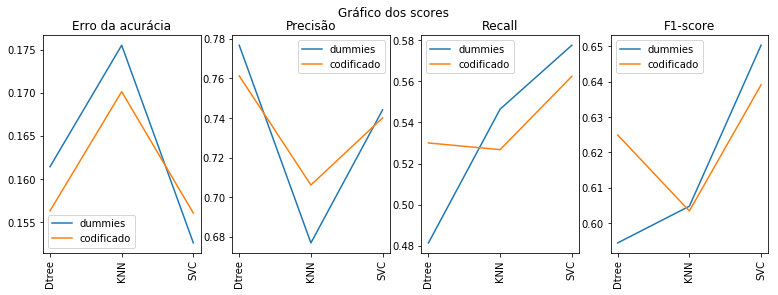

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=[13,4])
fig.suptitle('Gráfico dos scores')

ax[0].plot(results_wdum.loc['accuracy_error'], label='dummies')
ax[0].plot(results_encod.loc['accuracy_error'], label='codificado')
ax[0].set_title('Erro da acurácia')
ax[0].legend()

ax[1].plot(results_wdum.loc['precision_score'], label='dummies')
ax[1].plot(results_encod.loc['precision_score'], label='codificado')
ax[1].set_title('Precisão')
ax[1].legend()

ax[2].plot(results_wdum.loc['recall_score'],label='dummies')
ax[2].plot(results_encod.loc['recall_score'], label='codificado')
ax[2].set_title('Recall')
ax[2].legend()

ax[3].plot(results_wdum.loc['f1_score'], label='dummies')
ax[3].plot(results_encod.loc['f1_score'], label='codificado')
ax[3].set_title('F1-score')
ax[3].legend()

for a in ax:
    labels = ['Dtree', 'KNN', 'SVC']
    a.set_xticklabels(labels)
    for label in a.get_xticklabels():
        label.set_rotation(90)

# 8 - Outras técnicas de preprocessamento

Até o momento, apenas tratamos dados nulos e transformamos as variáveis nominais de dummies ou codificadas. No entanto, um olhar mais rofundo nos dados nos revela algumas informações redundantes. Podemos ver em marital-status, por exemplo, que essa variável pode assumir os valores de wife ou husband. Podemos simplificá-lo apenas dizendo se está casado ou não, o que implicaria em menor complexidade do modelo, sem perder informação importante. Existem outras variáveis que podeos simplificá-las também, e vamos explorá-las ao decorrer deste capítulo. Os resultados mostraram que os métodos utilizados no conjunto dummies se provaram ser a melhor alternativa, e portanto, vamos focar apenas neste método a partir deste momento

In [35]:
df_train_pp = df_train_nonull.copy().drop('education', axis=1)
df_test_pp = df_test_nonull.copy().drop('education', axis=1)

CATEGORICAL = list(set(CATEGORICAL) - set(['education'] )) + ['education-num', 'hours-per-week']

In [36]:
import re
"""
    age: continuous.
    
    workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    
    fnlwgt: continuous.
    
    education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    
    education-num: continuous.
    
    marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    
    occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, 
                Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, 
                Armed-Forces.
                
    relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    
    race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    
    sex: Female, Male.
    
    capital-gain: continuous.
    
    capital-loss: continuous.
    
    hours-per-week: continuous.
    
    native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, 
                    Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, 
                    Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, 
                    Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, 
                    Peru, Hong, Holand-Netherlands.

"""

def process_marital(series):
    series = series.apply(str.lower)
    func = lambda x: 'married' if x.startswith('married', 1) else 'single'
    series = series.apply(func)
    return series
    
def process_workclass(x):
    if re.search('private', x):
        return 'private'
    elif re.search('self',x):
        return 'self'
    elif re.search('gov', x):
        return 'gov'
    else:
        return 'other'

# Diminuimos para dois casos apenas, é casado ou nao, simplificando a coluna apenas
df_train_pp['marital-status'] = process_marital(df_train_nonull['marital-status'])
df_test_pp['marital-status'] = process_marital(df_test_nonull['marital-status'])

# Consideraremos apenas se é empresa privada, governamental, autonomo ou outros, simplificando a coluna apenas
df_train_pp['workclass'] = df_train_pp['workclass'].apply(str.lower).apply(lambda x: process_workclass(x))
df_test_pp['workclass'] = df_test_pp['workclass'].apply(str.lower).apply(lambda x: process_workclass(x))


In [37]:
df_train_pp.groupby('occupation')['target'].sum().sort_values()

occupation
 Armed-Forces            1
 Priv-house-serv         1
 Handlers-cleaners      83
 Farming-fishing       115
 Other-service         132
 Protective-serv       210
 Machine-op-inspct     245
 Tech-support          278
 Transport-moving      319
 Adm-clerical          498
 Craft-repair          908
 Sales                 970
 Prof-specialty       1811
 Exec-managerial      1937
Name: target, dtype: int64

Aparentemente, as pessoas que são managerial e specialty tem maiores chances de receberem mais de 50k por ano. Assim sendo, vamos dar maior peso para os empregos que aparecem mais vezes com salario superior a 50k, e menos para os outros.

In [38]:
def process_occupation(x):
    if re.search('managerial', x) or re.search('specialty', x):
        return 'high'
    elif re.search('sales', x) or re.search('craft', x):
        return 'medium'
    else:
        return 'low'

df_train_pp['occupation'] = df_train_pp['occupation'].apply(str.lower).apply(lambda x: process_occupation(x))
df_test_pp['occupation'] = df_test_pp['occupation'].apply(str.lower).apply(lambda x: process_occupation(x))

In [39]:
df_train_pp.groupby('race')['target'].sum().sort_values()

race
 Other                   21
 Amer-Indian-Eskimo      34
 Asian-Pac-Islander     248
 Black                  366
 White                 6839
Name: target, dtype: int64

Dada a frequencia da raça que recebe mais de 50k e que recebe menos que 50k, vamos fazer mais um preprocessamento nesta coluna

In [40]:
df_train_pp['race'] = df_train_pp['race'].apply(str.lower).apply(
                               str.strip).apply(
                               lambda x: 'white' if x.startswith('white') else 'other').head()

df_test_pp['race'] = df_test_pp['race'].apply(str.lower).apply(
                               str.strip).apply(
                               lambda x: 'white' if x.startswith('white') else 'other').head()

In [41]:
df_train_pp.groupby('target')['hours-per-week'].mean()

target
0    39.348592
1    45.706580
Name: hours-per-week, dtype: float64

Podemos ver que a média de horas trabalhadas das pessoas que recebem mais de 50k or ano é superior se comparado aos que recebem menos. Podemos criar uma nova variável categórico que tem valor high, pra pessoas que trabalham mais de 40 horas, medium pra menos de 40 e maior que 30, e low para todo o resto.

In [42]:
df_train_pp.groupby('target')['hours-per-week'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,22654.0,39.348592,11.950774,1.0,38.0,40.0,40.0,99.0
1,7508.0,45.706580,10.736987,1.0,40.0,40.0,50.0,99.0


Perceba que possuimos alguns outliers aqui. Assim, podemos resolvê-los apenas transformando essa coluna em categórico.

In [43]:
def process_hpw(x):
    if x > 40:
        return 'high'
    elif x <= 40 and x > 20:
        return 'medium'
    else:
        return 'low'

df_train_pp['hours-per-week'] = df_train_pp['hours-per-week'].apply(lambda x: process_hpw(x))
df_test_pp['hours-per-week'] = df_test_pp['hours-per-week'].apply(lambda x: process_hpw(x))

In [44]:
df_train_pp.groupby('target')['education-num'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,22654.0,9.629116,2.413596,1.0,9.0,9.0,10.0,16.0
1,7508.0,11.606420,2.368423,2.0,10.0,12.0,13.0,16.0


In [45]:
df_train_pp.groupby('education-num')['target'].sum()

education-num
1        0
2        6
3       12
4       35
5       25
6       59
7       59
8       29
9     1617
10    1336
11     344
12     256
13    2126
14     918
15     406
16     280
Name: target, dtype: int64

Aqui podemos enxergar outra divisao. Considerando que education-num indica os anos de estudo, odemos divido-lo em 3 categorias também.

In [46]:
def process_edu(x):
    if x > 10:
        return 'high'
    elif x <= 10 and x > 8:
        return 'medium'
    else:
        return 'low'

df_train_pp['education-num'] = df_train_pp['education-num'].apply(lambda x: process_edu(x))
df_test_pp['education-num'] = df_test_pp['education-num'].apply(lambda x: process_edu(x))

Agora que processammos todas os atributos (features) que nos importava, vamos agora extrair os dummies. Mas antes devemo transformá-los em category

In [47]:
for cat in CATEGORICAL:
    df_train_pp.loc[:, cat] = pd.Categorical(df_train_pp[cat])
    df_test_pp.loc[:, cat] = pd.Categorical(df_test_pp[cat])


In [49]:
dummies = pd.get_dummies(df_train_pp[CATEGORICAL])
df_train_pp = pd.concat([dummies, df_train_pp], axis=1)

dummies = pd.get_dummies(df_test_pp[CATEGORICAL])
df_test_pp = pd.concat([dummies, df_test_pp], axis=1)

In [50]:
# mesmo problema encontrando anteriormente no item 6
df_test_pp['native-country_ Holand-Netherlands'] = 0
df_test_pp = df_test_pp.reindex(columns=df_train_pp.columns)

In [51]:
df_train_pp.drop(CATEGORICAL, axis=1, inplace=True)
df_test_pp.drop(CATEGORICAL, axis=1, inplace=True)

Considerando os resultados mostrados no item 7, temos que o SVM teve melhor performance dentre árvore de decisão e o knn. Portanto, utilizarem aqui o mesmo classificador com aqueles mesmos parâmetros e testá-lo.

In [55]:
X = scaler.fit_transform(df_train_pp.drop(['target'], axis=1))
y = df_train_pp['target']

svc_clf = SVC(**result_wdum['Support Vector Machines']['best_params'])
svc_clf.fit(X, y)
y_pred = svc_clf.predict(X)
print('Modelo dois (com dummies e engenharia de atributos) conjunto de TREINO: \
       Logistic Regression\nErro da acurácia: {}\n{}'.format(1 - accuracy_score(y, y_pred),
                                                             classification_report(y, y_pred)))


X_ = scaler.fit_transform(df_test_pp.drop(['target'], axis=1))
y_ = df_test_pp['target']

y_pred_ = svc_clf.predict(X_)
print('Modelo dois (com dummies e engenharia de atributos) conjunto de TESTE: \
       Logistic Regression\nErro da Acurácia: {}\n{}'.format(1 - accuracy_score(y_, y_pred_),
                                                          classification_report(y_, y_pred_)))

print('Matriz de confusão\n{}'.format(confusion_matrix(y_, y_pred_)))

Modelo dois (com dummies e engenharia de atributos) conjunto de TREINO:        Logistic Regression
Erro da acurácia: 0.15426695842450766
             precision    recall  f1-score   support

          0       0.87      0.94      0.90     22654
          1       0.76      0.56      0.64      7508

avg / total       0.84      0.85      0.84     30162

Modelo dois (com dummies e engenharia de atributos) conjunto de TESTE:        Logistic Regression
Erro da Acurácia: 0.15657370517928282
             precision    recall  f1-score   support

          0       0.87      0.94      0.90     11360
          1       0.74      0.55      0.63      3700

avg / total       0.84      0.84      0.84     15060

Matriz de confusão
[[10656   704]
 [ 1654  2046]]
